# Module 3 Project - Asset Movements - Technical Document
## Andrew Cole & Will Herzog

In [12]:
# Import libraries with proper aliases
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import math
from statsmodels.stats.power import zt_ind_solve_power
import asset_cleaner
import test_statistics
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Gathering XLV/S&P 500 API data and organizing into operable pandas DF

In [13]:
# Load XLV-asset data and add series with the calculations of daily percent change as well as overall percent change
xlv_symbol = 'XLV'
xlv_df = asset_cleaner.clean_asset_data(xlv_symbol)
display(xlv_df.head())
xlv_df.shape

,date,open,high,low,close,volume,day_pct_change,overall_pct_change
0,2019-12-13,100.85,101.47,100.470,100.665,3325531.0,-0.183441,239.053553
1,2019-12-12,100.07,101.28,100.020,100.950,9769053.0,0.879384,240.013473
2,2019-12-11,100.01,100.27,99.820,100.020,6010787.0,0.009999,236.881105
3,2019-12-10,99.69,100.02,99.295,99.930,6027927.0,0.240746,236.577972
4,2019-12-09,100.45,100.47,99.710,99.710,5148857.0,-0.736685,235.836982


(5034, 8)

In [14]:
#Load S&P 500 data
sp_symbol = 'INX'
sp_df = asset_cleaner.clean_asset_data(sp_symbol)
sp_df.head()

,date,open,high,low,close,volume,day_pct_change,overall_pct_change
0,2019-12-13,3166.6499,3182.6799,3156.5100,3163.7400,7.963713e+08,-0.091892,115.330271
1,2019-12-12,3141.2300,3176.2800,3138.4700,3168.5701,3.990690e+09,0.870363,115.659017
2,2019-12-11,3135.7500,3143.9800,3133.2100,3141.6299,3.252540e+09,0.187512,113.825414
3,2019-12-10,3135.3601,3142.1201,3126.0901,3132.5200,3.343790e+09,-0.090583,113.205377
4,2019-12-09,3141.8601,3148.8701,3135.4600,3135.9600,3.345990e+09,-0.187790,113.439510


### Hypothesis Testing: Average Daily Returns (XLV - S&P 500)

##### H0: The daily avg percent change in the XLV index fund is not different to that of the overall S&P 500
##### HA: The daily avg percent change in the XLV index fund is different than the S&P 500

In [15]:
xlv_avg_percent_moves = []
sp_avg_percent_moves = []

for i in range(5000):
    
    sample_xlv = xlv_df.sample(n = 50, random_state = i)
    xlv_avg_percent_moves.append(sample_xlv.day_pct_change.mean())
    
    sample_sp = sp_df.sample(n = 50, random_state = i)
    sp_avg_percent_moves.append(sample_sp.day_pct_change.mean())


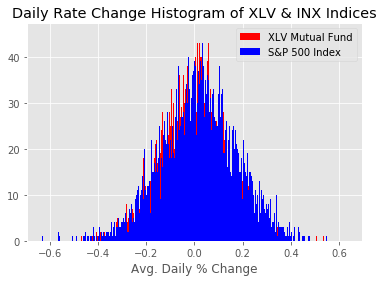

In [16]:
plt.style.use('ggplot')
plt.hist(xlv_avg_percent_moves, bins = 500, color = 'red', label = 'XLV Mutual Fund');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500 Index');
plt.xlabel('Avg. Daily % Change');
plt.title('Daily Rate Change Histogram of XLV & INX Indices');
plt.legend();

In [17]:
# Calculate a z-stat, p-stat, and standard error for XLV sample and S&P500 benchmark
test_statistics.calculate_test_stats(xlv_avg_percent_moves, sp_avg_percent_moves)

 Z-stat; -0.0021196866762410215 
 P-Value: 0.49915436799689145 
 Standard Error: 0.0022410453619876574


In [18]:
def cohen_d(xlv, sp500):

    diff_mean = xlv.mean() - sp500.mean()

    n_xlv = len(xlv)
    n_sp500 = len(sp500)
    var_xlv = xlv.var()
    var_sp500 = sp500.var()

    pooled_var = (n_xlv * var_xlv + n_sp500 * var_sp500) / (n_xlv + n_sp500)

    cod = diff_mean / np.sqrt(pooled_var)

    return cod

xlv_sp_cohen_d = cohen_d(xlv_df['day_pct_change'], sp_df['day_pct_change'])
print(f"XLV-S&P Cohen's D: {xlv_sp_cohen_d}")

XLV-S&P Cohen's D: -0.018577801617461465


### Gathering Johnson & Johnson API data and organizing into operable pandas DF

In [19]:
# Load JNJ data and add series with the calculations of daily percent change as well as overall percent change

jj_symbol = 'JNJ'
jj_df = asset_cleaner.clean_asset_data(jj_symbol)
jj_df.head()

,date,open,high,low,close,volume,day_pct_change,overall_pct_change
0,2019-12-13,141.10,141.80,140.3100,140.3747,1337929.0,-0.514033,48.340590
1,2019-12-12,141.32,142.06,140.7300,141.3400,5011366.0,0.014152,49.360668
2,2019-12-11,140.93,141.98,140.6300,140.9800,6498780.0,0.035479,48.980239
3,2019-12-10,140.80,141.00,139.9100,139.9900,5310334.0,-0.575284,47.934059
4,2019-12-09,140.39,140.81,140.0601,140.5000,4240984.0,0.078353,48.473000


### Hypothesis Testing: Average Daily Returns (Johnson & Johnson - S&P 500)

##### H0: The daily avg percent change in the JNJ index fund is not different to that of the overall S&P 500
##### HA: The daily avg percent change in the JNJ index fund is different than the S&P 500

In [20]:
jj_avg_percent_moves = []

for i in range(5000):
    
    sample_jj = jj_df.sample(n = 50, random_state = i)
    jj_avg_percent_moves.append(sample_jj.day_pct_change.mean())


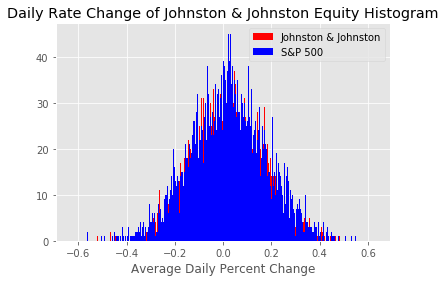

In [21]:
plt.style.use('ggplot')
plt.hist(jj_avg_percent_moves, bins = 500, color = 'red', label = 'Johnston & Johnston');
plt.hist(sp_avg_percent_moves, bins = 500, color = 'blue', label = 'S&P 500');
plt.xlabel('Average Daily Percent Change')
plt.title('Daily Rate Change of Johnston & Johnston Equity Histogram')
# plt.hist(xlv_avg_percent_moves, bins = 500, color = 'pink', label = 'XLV');
plt.legend();  

In [22]:
test_statistics.calculate_test_stats(jj_avg_percent_moves, sp_avg_percent_moves)

 Z-stat; -1.6280212783206643e-05 
 P-Value: 0.49999350513478713 
 Standard Error: 0.0022410453619876574


In [23]:
def cohen_d(xlv, sp500):

    diff_mean = xlv.mean() - sp500.mean()

    n_xlv = len(xlv)
    n_sp500 = len(sp500)
    var_xlv = xlv.var()
    var_sp500 = sp500.var()

    pooled_var = (n_xlv * var_xlv + n_sp500 * var_sp500) / (n_xlv + n_sp500)

    cod = diff_mean / np.sqrt(pooled_var)

    return cod

jj_sp_cohen_d = cohen_d(jj_df['day_pct_change'], sp_df['day_pct_change'])
print(f"JNJ-S&P Cohen's D: {jj_sp_cohen_d}")

JNJ-S&P Cohen's D: 0.0035906507188306685


# Healthcare RSI Statistical significance
#### Will Herzog
### Null Hypothesis - The RSI of the heathcare fund, XLV, is the same as the RSI for the S&P 500
### Alternative Hypothesis - The RSI of the heathcare fund, XLV, is different from the RSI for the S&P 500

Access the API, and retrieve the json file

In [24]:
key_alphavantage = '9HXBL1MHLXSUW3XP'
function = 'RSI'
interval = 'daily'

In [25]:
symbol1 = 'XLV'

response = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol1}&interval={interval}&time_period=10&series_type=open&apikey={key_alphavantage}')
response = response.json()

In [26]:
symbol2 = '.INX'

response2 = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol2}&interval=daily&time_period=10&series_type=open&apikey={key_alphavantage}')
response2 = response2.json()

Getting a list of dates for both the XLV and the S&P500 for further cleaning/prepping and retrieving RSI values

In [27]:
xlv_dates= list(response[f'Technical Analysis: {function}'].keys())
xlv_dates = xlv_dates[1:]

In [28]:
sp500_dates = list(response2[f'Technical Analysis: {function}'].keys())
sp500_dates = sp500_dates[1:]

These cells create new dictionaries with just the information I'm looking at, the keys are the dates and the values are the corresponding RSIs

In [29]:
xlv_dates_rsi = {}

count = 0
for i in xlv_dates:
    rsi = response[f'Technical Analysis: {function}'][i][f'{function}']
    count += 1
    xlv_dates_rsi[f'{i}'] = float(rsi)

In [30]:
sp500_dates_rsi = {}

count2 = 0 
for i in sp500_dates:
    rsi2 = response2[f'Technical Analysis: {function}'][i][f'{function}']
    count2 += 1
    sp500_dates_rsi[f'{i}'] = float(rsi2)

Below, I'm initializing the dataframes for the XLV and S&P500 data

In [31]:
xlvdf = pd.DataFrame(xlv_dates_rsi.items(), columns = ['date', f'{function}'])

In [32]:
sp500df = pd.DataFrame(sp500_dates_rsi.items(), columns = ['date', f'{function}'])

Here I'm removing the hypen and seperating the date into seperate columns for year, month, and day

In [33]:
year = [int(xlv_dates[i].split('-')[0]) for i in range(len(xlv_dates))]
month = [int(xlv_dates[i].split('-')[1]) for i in range(len(xlv_dates))]
day = [int(xlv_dates[i].split('-')[2]) for i in range(len(xlv_dates))]

In [34]:
year2 = [int(sp500_dates[i].split('-')[0]) for i in range(len(sp500_dates))]
month2 = [int(sp500_dates[i].split('-')[1]) for i in range(len(sp500_dates))]
day2 = [int(sp500_dates[i].split('-')[2]) for i in range(len(sp500_dates))]

In [35]:
xlvdf['year'] = year
xlvdf['month'] = month
xlvdf['day'] = day

In [36]:
sp500df['year'] = year2
sp500df['month'] = month2
sp500df['day'] = day2

Below, I'm restricting the data for dates after 2016.

This will get us an accurate representation of current market dynamic.

In [37]:
xlvdf = xlvdf.loc[xlvdf['year'] >= 2017]
sp500df = sp500df.loc[sp500df['year'] >= 2017]

## Comparing the normalized RSI data for XLV and S&P500 

### 2017 Through 2019 YTD
Below, I'm taking a sampling distribution for the XLV and S&P500

In [38]:
xlv_sample_means = []
sp500_sample_means = []
for i in range(10000):
    xlv_sample = xlvdf.sample(n=50, random_state=i) 
    xlv_sample_means.append(xlv_sample.RSI.mean()) 
        
    sp500_sample = sp500df.sample(n=50, random_state=i) 
    sp500_sample_means.append(sp500_sample.RSI.mean()) 

### Evaluating z - score and statistical significance

In [39]:
xlv_bar = xlvdf.RSI.mean()  ### xlv population mean (subset)
sp500_bar = sp500df.RSI.mean() ### S&P500 population mean (universal population)

sp500_stan_dev = np.std(sp500df.RSI) ### S&P500 population standard dev
sp500_stan_err = sp500_stan_dev/np.sqrt(len(sp500df))
xlv_z_score = (xlv_bar - sp500_bar) / (sp500_stan_dev/np.sqrt(len(sp500df)))

print(f'The z_score is: {xlv_z_score}')
xlv_p_val = stats.norm.cdf(xlv_z_score)

print(f'The p-value is: {xlv_p_val}')
print(f'The standard deviation is {sp500_stan_dev}')
print(f'The standard error is {sp500_stan_err}')   ### Z_score * Standard error = real difference between sample and pop means

The z_score is: -3.5532242921711
The p-value is: 0.0001902699297316012
The standard deviation is 14.47839017477702
The standard error is 0.5315184245640511


This has a large z-score and, consequentialy a small p-value. Meaning there is a very small chance that we have accidentally rejected our null hypothesis.

### Plotting Histogram Visual 

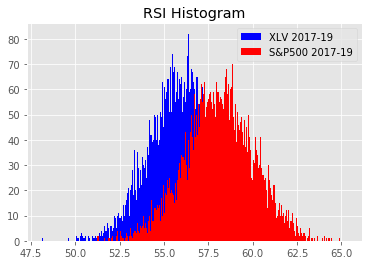

In [40]:
plt.hist(xlv_sample_means, bins=500, color = 'blue', label='XLV 2017-19');
plt.hist(sp500_sample_means, bins=500, color = 'red', label='S&P500 2017-19');
plt.title('RSI Histogram')
plt.legend();

## Cohen's D and Power - How significant is the Difference?

By finding the Cohen's D and Power of these distributions we will be able to better interpret the actual significance of our findings.

In [41]:
def cohen_d(xlv, sp500):

    diff_mean = xlv.mean() - sp500.mean()

    n_xlv = len(xlv)
    n_sp500 = len(sp500)
    var_xlv = xlv.var()
    var_sp500 = sp500.var()

    pooled_var = (n_xlv * var_xlv + n_sp500 * var_sp500) / (n_xlv + n_sp500)

    cod = diff_mean / np.sqrt(pooled_var)

    return cod

In [42]:
xlv_cod = cohen_d(xlvdf['RSI'], sp500df['RSI'])

In [43]:
n1_xlv = len(xlvdf['RSI'])
n2_sp500 = len(sp500df['RSI'])
ratio = n1_xlv/n2_sp500
xlv_power = zt_ind_solve_power(effect_size = xlv_cod, nobs1=n1_xlv, power = None, alpha = .05) 
print(f'Power = {xlv_power}\nCohen D = {xlv_cod}')

Power = 0.7145397019706381
Cohen D = -0.1311771083823407


In [44]:
xlvdf['RSI'].mean() - sp500df['RSI'].mean()

-1.8886041778974985

It can be inferred that there is a difference, but since power is less than .8, it is less significant. This can be attributed to the small Cohen's D value, less than |.2|, meaning there is a small effect on different populations

### Null Hypothesis - The RSI of Johnson & Johnson, the largest holdings in the XLV, mirrors the RSI of the XLV
### Alternative Hypothesis - The RSI of Johnson & Johnson, the largest holdings in the XLV, is different from the RSI of the XLV

This was conducted with a similar process to above hypothesis

In [45]:
symbol_list = ['JNJ'] 

In [46]:
all_list = []
for symbol in symbol_list:
    response = requests.get(f'https://www.alphavantage.co/query?function={function}&symbol={symbol}&interval={interval}&time_period=10&series_type=open&apikey={key_alphavantage}')
    jason = response.json()
    all_list.append(jason)

In [47]:
dictjnj = {}

len_jnj = len(all_list[0]['Technical Analysis: RSI'])
for i in range(len_jnj):
    date = list(all_list[0]['Technical Analysis: RSI'].keys())[i]
    rsi = float(list(all_list[0]['Technical Analysis: RSI'].values())[i]['RSI'])
    dictjnj[f'{date}'] = rsi
df_jnj = pd.DataFrame(dictjnj.items(), columns = ['date', 'rsi'])

year = []
for i in range(len_jnj):
    year.append(int(df_jnj['date'][i].split('-')[0]))

In [48]:
df_jnj['year'] = year
df_jnj.drop(0, inplace = True)

Again, we restrict the data to 2017 and later data 

In [49]:
df_jnj = df_jnj.loc[df_jnj['year'] >= 2017] #2017 and newer data

And take create sampling distributions to normalize our data

In [50]:
jnj_sample_means = []

for i in range(10000):
    jnj_sample = df_jnj.sample(n=50, random_state=i) 
    jnj_sample_means.append(jnj_sample.rsi.mean()) 

In [51]:
jnj_bar= df_jnj.rsi.mean()  ### johnson and johnson population mean (subset)

xlv_stan_dev = np.std(xlvdf.RSI)
xlv_stan_err = xlv_stan_dev/np.sqrt(len(xlvdf))

jnj_z_score = (jnj_bar - xlv_bar) / (xlv_stan_dev/np.sqrt(len(xlvdf)))
jnj_p_val = stats.norm.cdf(jnj_z_score)
p_valjnj = stats.norm.cdf(jnj_z_score)

print(f'The z_score is: {jnj_z_score}')
print(f'The p-value is: {jnj_p_val}')
print(f'The standard deviation is {xlv_stan_dev}')
print(f'The standard error is {xlv_stan_err}')

The z_score is: -4.917611908104116
The p-value is: 4.3803188163740013e-07
The standard deviation is 14.29634588522281
The standard error is 0.524835368449615


The z-score is very large and as a result the p-value is almost 0, meaning that there is a minimal chance of falsely regecting our null hypothesis.

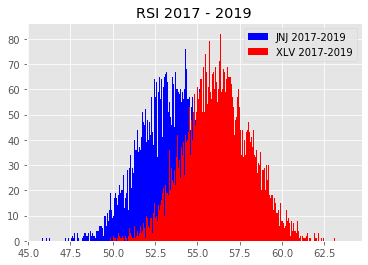

In [57]:
plt.hist(jnj_sample_means, bins=500, color='blue', label='JNJ 2017-2019');
plt.hist(xlv_sample_means, bins=500, color='red', label='XLV 2017-2019');
plt.title('RSI 2017 - 2019')
plt.legend();

Below is an example of how the z-score when multiplied by the standard error is equivalent to the difference of the distributions.

In [53]:
print(jnj_z_score * xlv_stan_err)
print(jnj_bar - xlv_bar)

-2.580936657682038
-2.580936657682038


### Cohen's D for Johnson & Johnson and XLV - 2017-2019

In [54]:
codjnj = cohen_d(df_jnj['rsi'], xlvdf['RSI'])

In [55]:
n1_jnj = len(df_jnj['rsi'])
n2_xlv = len(xlvdf['RSI'])
ratio = n1_jnj/n2_xlv
jnj_power = zt_ind_solve_power(effect_size = codjnj, nobs1=n1_jnj, power = None, alpha = .05) 
print(f'Power= {jnj_power}\nCohen D= {codjnj}')

Power= 0.9337192026462193
Cohen D= -0.17984402456369059


In contrast to the prior power analysis, the power is greater than .8, in spite of the relativly small Cohen's D, less than |.2|. Meaning that there is a decisive difference in the two groups, although the effect size is small.